1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
The predicted disease is: blackmould


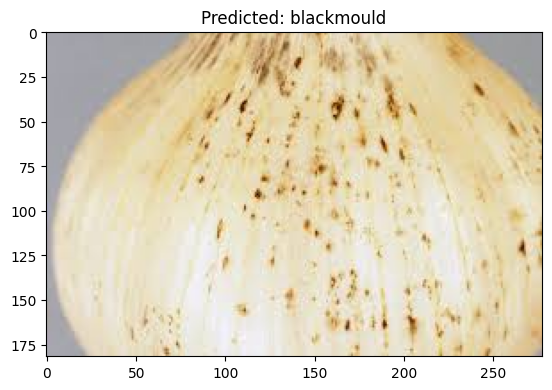

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('trained_plant_disease_model.keras')

# Define class names manually or extract from a dataset
class_names = ['blackmould' ,'class2' , 'whiteroot' ,' class4' , 'class5' ]

# Preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Change to your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Scale pixel values to [0, 1]
    return img_array

# Predict the disease
def predict_disease(img_path, model):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Decode the prediction
    class_idx = np.argmax(prediction, axis=1)[0]
    
    # Get the predicted class name
    predicted_class = class_names[class_idx]
    
    return predicted_class

# Path to the image you want to predict
img_path = 'image.jpg'  # Replace with the path to your image

# Predict and print the result
predicted_class = predict_disease(img_path, model)
print(f"The predicted disease is: {predicted_class}")

# Display the image with the prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.show()
